In [16]:
from scipy import signal
import numpy as np

fp = 15500 # Original Passband frequency in Hz
fa = 3875 # Original Stopband frequency in Hz

Ap = 2 # Original Passband attenuation in dB
Aa = 40 # Original Stopband attenuation in dB

wp = 2 * fp * np.pi # Passband frequency in rad/s
wa = 2 * fa * np.pi # Stopband frequency in rad/s


# Modified Values
fp2 = 14200
fa2 = 4150

Ap2 = 0.15
Aa2 = 41
wp2 = 2 * fp2 * np.pi
wa2 = 2 * fa2 * np.pi

Minimum order of the filter: 3
k: 0.9015711376059569


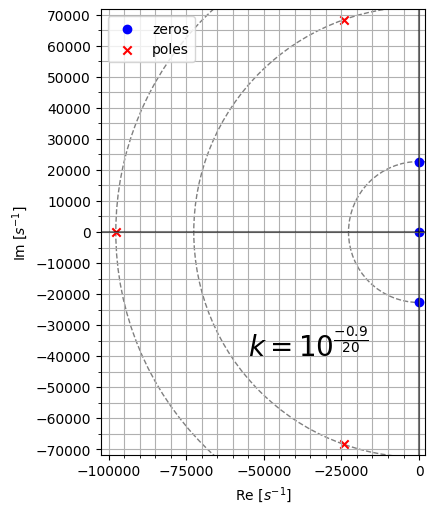

In [17]:
# Calculate the minimum order of the filter
N, Wn = signal.ellipord(wp2, wa2, Ap2, Aa2, analog=True)

# Print the minimum order of the filter
print("Minimum order of the filter:", N)

z, p, k = signal.ellip(N, Ap2, Aa2, Wn, btype='highpass', analog=True, output='zpk')
k = k * 10**(-0.9/20)
print("k:", k)

from plot_utils import PoleZeroPlotter, save_pdf
plotter = PoleZeroPlotter(figsize=(5,5))
plotter.drawText("$k=10^{ \\frac{-0.9}{20} }$", (-55000, -40000), fontsize=20)
plotter.drawCircle((0,0), np.abs(p[1]))
plotter.drawCircle((0,0), np.abs(p[0]))
plotter.drawCircle((0,0), np.abs(z[0]))
plotter.addPoles(p)
plotter.addZeros(z)
plotter.show(aspect='equal')
plotter.fig.tight_layout()
# save_pdf("cauer_pzk", plotter.fig)

In [18]:
# z,p,k to transfer function
num, den = signal.zpk2tf(z, p, k)
print("num:", num)  
print("den:", den)

import sympy as sp
# to sympy expression
s = sp.symbols('s')
H = sp.Poly(num, s) / sp.Poly(den, s)
display(sp.Eq(sp.Symbol('H'), H))
print(sp.latex(sp.Eq(sp.Symbol('H'), H)))

num: [9.01571138e-01 0.00000000e+00 4.65478139e+08 0.00000000e+00]
den: [1.00000000e+00 1.46383816e+05 1.00262829e+10 5.15157171e+14]


Eq(H, (0.901571137605957*s**3 + 465478138.781306*s)/(1.0*s**3 + 146383.816466332*s**2 + 10026282860.0072*s + 515157171071408.0))

H = \frac{0.901571137605957 s^{3} + 465478138.781306 s}{1.0 s^{3} + 146383.816466332 s^{2} + 10026282860.0072 s + 515157171071408.0}


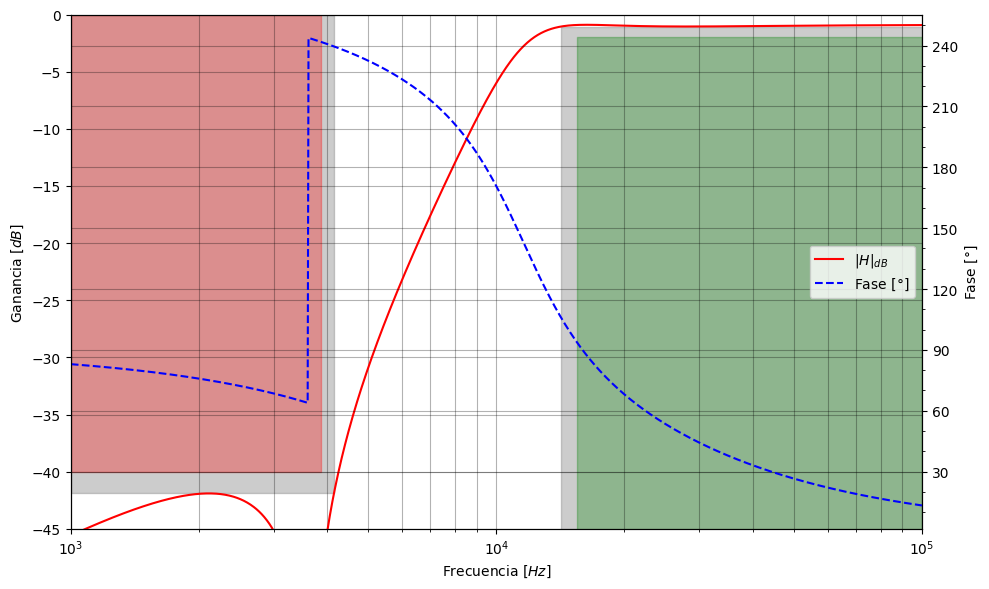

In [19]:
# Evaluate the frequency response of the filter
f_log = np.logspace(3, 5, 1000)
w_log = 2 * np.pi * f_log
_, h = signal.freqs_zpk(z, p, k, worN=w_log)

# Plot the frequency response of the filter
from plot_utils import PlotBode, fixPhaseJumps
gain = 20*np.log10(np.abs(h))
phase = np.angle(h, deg=True)
phase = fixPhaseJumps(phase)

plotter = PlotBode()
plotter.plotSemilog1(f_log, gain, label='$|H|_{{dB}}$', color='red')
plotter.plotSemilog2(f_log, phase, label='Fase $[\\degree]$', color='blue', linestyle='--')

plotter.drawRectangle1(f_log[0], fa2, -Aa2+20*np.log10(k), 0, color='gray', alpha=.4)
plotter.drawRectangle1(fp2, f_log[-1], -1e2, -Ap2+20*np.log10(k), color='gray', alpha=.4)

plotter.drawRectangle1(f_log[0], fa, -Aa, 0, color='red', alpha=.3)
plotter.drawRectangle1(fp, f_log[-1], -1e2, -Ap, color='green', alpha=.3)

# plotter.plotLinear1([f_log[0], f_log[-1]], [-0.9, -0.9], label='k', color='black', linestyle='--', alpha=.8)
# plotter.ax1.text(2e4, -0.88, '$ k = -0.9dB } $', fontsize=14, color='black', alpha=1)

plotter.show(loc='center right', y1limits=[-45, 0], gridcolor='black', gridalpha=.3)
# save_pdf("cauer_bode", plotter.fig)

In [20]:
# get design poles
sedraPoles = [pole for pole in p if pole.imag != 0 and pole.real != 0]
realPoles = [pole for pole in p if pole.imag == 0 and pole.real != 0]
print("Sedra Poles:", sedraPoles)
print("Real Poles:", np.abs(realPoles))

Sedra Poles: [(-24327.47504311719+68406.60569218334j), (-24327.47504311719-68406.60569218334j)]
Real Poles: [97728.8663801]


In [21]:
# Get Zero frequencies (img > 0)
sedraZeros = [zero for zero in z if zero.imag != 0]
for zero in sedraZeros:
    wz = np.abs(zero)
    print(f"Zero = {wz:.2f} rad/s  = {wz/(2*np.pi) :.2f} Hz") 

Zero = 22722.16 rad/s  = 3616.34 Hz
Zero = 22722.16 rad/s  = 3616.34 Hz


In [22]:
for p in sedraPoles:
    # Get Q and wo of the poles
    w0 = np.abs(p)
    Q = w0 / (2 * (-p.real))
    print("Q:", Q, f"  w0 = {w0:.2f} rad/s  = {w0/(2*np.pi) :.2f} Hz")

Q: 1.492215039916194   w0 = 72603.65 rad/s  = 11555.23 Hz
Q: 1.492215039916194   w0 = 72603.65 rad/s  = 11555.23 Hz


In [23]:
n2 = 0.5

# z,p,k to transfer function
numSedra, denSedra = signal.zpk2tf(sedraZeros, sedraPoles, n2)
print("num:", numSedra)  
print("den:", denSedra)

import sympy as sp
# to sympy expression
s = sp.symbols('s')
H = sp.Poly(numSedra, s) / sp.Poly(denSedra, s)
display(sp.Eq(sp.Symbol('H'), H))
print("H(s):", H)

num: [5.00000000e-01 0.00000000e+00 2.58148314e+08]
den: [1.00000000e+00 4.86549501e+04 5.27128974e+09]


Eq(H, (0.5*s**2 + 258148314.29572)/(1.0*s**2 + 48654.9500862344*s + 5271289744.29934))

H(s): (0.5*s**2 + 258148314.29572)/(1.0*s**2 + 48654.9500862344*s + 5271289744.29934)


Max G = -2.7dB = 0.733


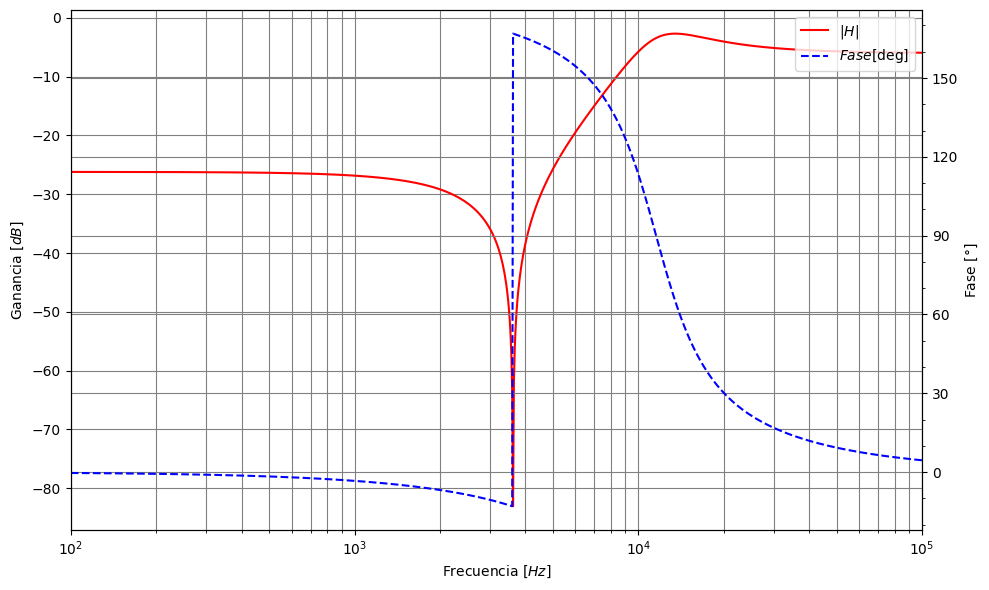

In [24]:
# Simulate Sedra frequency response
f_log = np.logspace(2, 5, 1000)
w_log = 2 * np.pi * f_log
_, hSedra = signal.freqs_zpk(sedraZeros, sedraPoles, n2, worN=w_log)

g = 20*np.log10(np.abs(hSedra))
p = np.angle(hSedra, deg=True)
# Plot the frequency response of the filter
from plot_utils import PlotBode
bode = PlotBode()
bode.plotSemilog1(f_log, g, label='$|H|$', color='red')
bode.plotSemilog2(f_log, p, label='$Fase [\\deg]$', color='blue', linestyle='--')

# Get Max g value
maxG = np.max(g)
print(f"Max G = {maxG:.1f}dB = {10**(maxG/20):.3f}")

bode.show()